<a href="https://colab.research.google.com/github/man0045/Data-Science/blob/master/Copy_of_loss_Funtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use("fivethirtyeight")

In [ ]:
def MAE(actual, pred):
  return np.abs(actual-pred)

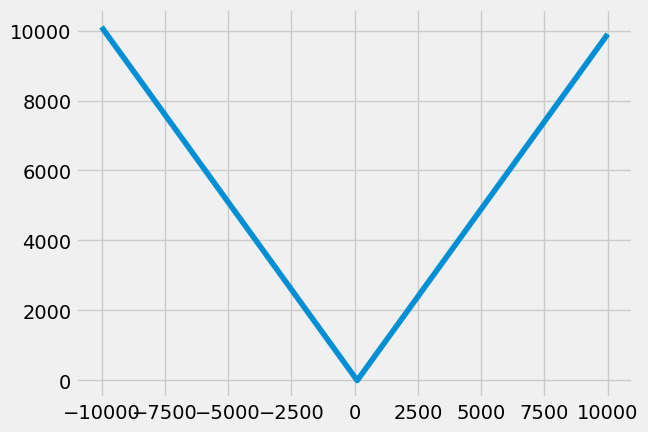

In [ ]:
actual_arr = np.repeat(100, 10000)
pred_arr = np.arange(-10000, 10000, 2)
loss_mae = [MAE(actual, pred) for actual, pred in zip(actual_arr, pred_arr)]
plt.plot(pred_arr, loss_mae)

In [ ]:
total_loss = np.mean(np.sum(loss_mae))
total_loss

50005100.0

In [ ]:
def MSE(actual, pred):
  return np.square(actual - pred)

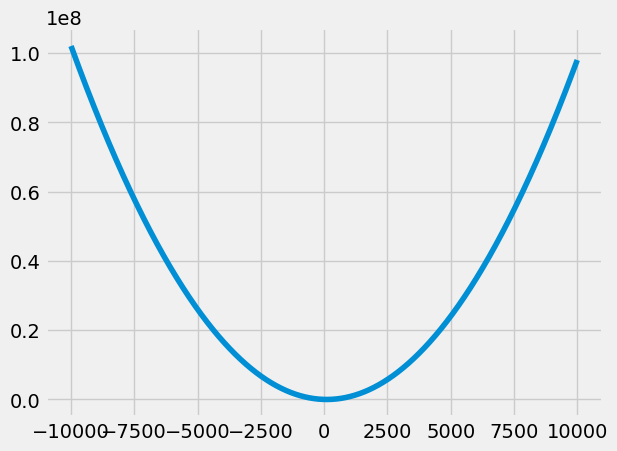

In [ ]:
actual_arr = np.repeat(100, 10000)
pred_arr = np.arange(-10000, 10000, 2)
loss_mSe = [MSE(actual, pred) for actual, pred in zip(actual_arr, pred_arr)]
plt.plot(pred_arr, loss_mSe)

In [ ]:
total_loss = np.mean(np.mean(loss_mSe))
total_loss

33343534.0

In [ ]:
def huber(true, pred, delta):
  loss = np.where(np.abs(true-pred) < delta, 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
  return loss

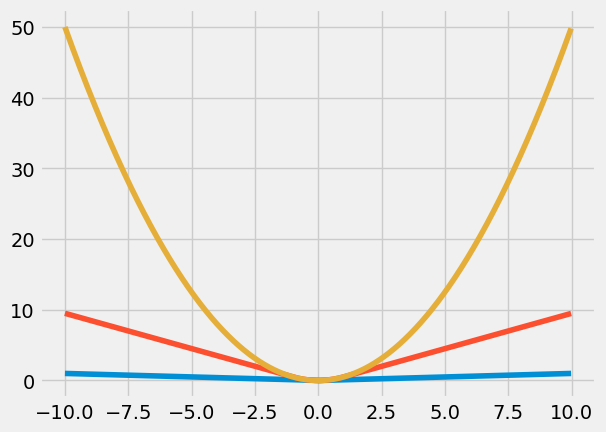

In [ ]:
actual_arr = np.repeat(0, 1000)
pred_arr = np.arange(-10, 10, 0.02)

deltas = [0.1, 1, 10]

loss_huber = [[huber(actual, pred, delta) for actual, pred in zip(actual_arr, pred_arr)] for delta in deltas]

for idx in range(len(deltas)):
  plt.plot(pred_arr, loss_huber[idx])

In [ ]:
x_function = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

delta1 = tf.constant(0.2)
pseudo_huber1_output = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_function)/delta1)) - 1.0)

delta2 = tf.constant(1.0)
pseudo_huber2_output = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_function)/delta2)) -1.)

delta3 = tf.constant(5.)
pseudo_huber3_output = tf.multiply(tf.square(delta3), tf.sqrt(1. + tf.square((target - x_function) / delta2)) - 1.)

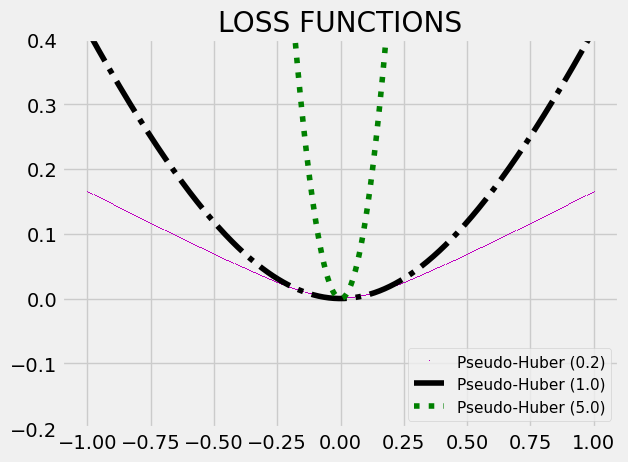

In [ ]:
x_array = x_function
plt.plot(x_array, pseudo_huber1_output, 'm,', label='Pseudo-Huber (0.2)')
plt.plot(x_array, pseudo_huber2_output, 'k-.', label='Pseudo-Huber (1.0)')
plt.plot(x_array, pseudo_huber3_output, 'g:', label='Pseudo-Huber (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.title('LOSS FUNCTIONS')
plt.show()

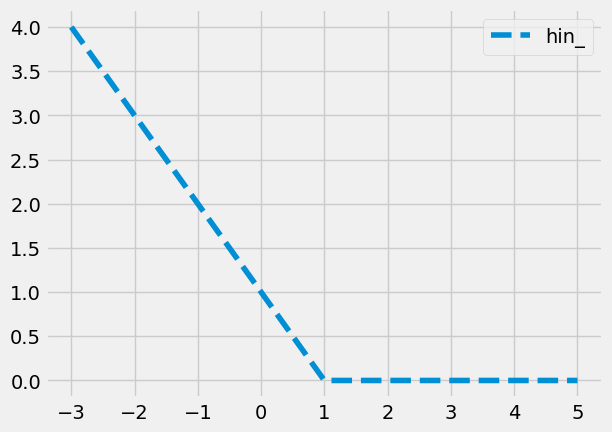

In [ ]:
x_guess2 = tf.linspace(-3.,5.,500)
x_actual2 = tf.convert_to_tensor([1.]*500)

#Hinge loss
#hinge_loss = tf.losses.hinge_loss(labels=x_actual2, logits=x_guess2)
hinge_loss = tf.maximum(0.,1.-(x_guess2*x_actual2))
# with tf.Session() as sess:
x_,hin_ = [x_guess2, hinge_loss]
plt.plot(x_,hin_,'--', label='hin_')
plt.legend()
plt.show()